In [15]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import butter, lfilter

In [46]:
def low_pass_filter(data, cutoff=2000, fs=48000, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return lfilter(b, a, data)

audio_data = np.genfromtxt("data_collection/niccolo/1_7_happy_vocal/Audio_Log.csv", delimiter=',')

num_mics = 7
data_np = audio_data.flatten()
num_samples = len(data_np) // num_mics

audio_data = np.reshape(data_np, (num_samples, num_mics)).T

# WAV
audio_data = audio_data / np.max(np.abs(audio_data))

sample_rate = 48000
output_file = "output_audio.wav"
sf.write(output_file, audio_data.T, samplerate=sample_rate)

# PCM
# audio_data = audio_data.astype(np.float64)
# # audio_data = np.array([low_pass_filter(ch) for ch in audio_data])
# audio_data = audio_data / np.max(np.abs(audio_data))
# audio_data = (audio_data * 32767).astype(np.int16)

# sample_rate = 48000
# output_file = "output_audio_16bit.wav"
# sf.write(output_file, audio_data.T, samplerate=sample_rate, subtype='PCM_16')

(7, 829952)


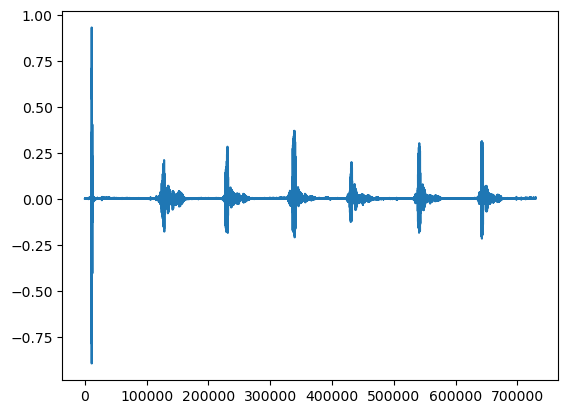

In [48]:
print(audio_data.shape)
plt.plot(audio_data[0][100000:])
plt.show()